### E-Commerce Segmentaion 


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Loading Data
df=pd.read_csv("/content/drive/MyDrive/GUVI MAIN PRO /data.csv", encoding='latin')

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
#Reading Data

print(df.shape)
print("="*10)
print(df.info())
print("="*10)
print(df.isnull().sum())
print("="*10)


(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [39]:
for i in df.columns:
    print(i,"  :  ",df[i].nunique())
    

InvoiceNo   :   25900
StockCode   :   4070
Description   :   4223
Quantity   :   722
InvoiceDate   :   23260
UnitPrice   :   1630
CustomerID   :   4372
Country   :   38


In [40]:
#Dropping Unwanted Columns 
df.drop(columns=["InvoiceNo","InvoiceDate"], inplace=True)
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [41]:
df["Quantity"].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [42]:
#Converting negative quantity to positive
def chk_positive(val):
    if val<=0:
        return (val*(-1))
    else:
        return val
df['Quantity'] = [ chk_positive(Quantity) for Quantity in df['Quantity']]

In [43]:
df["Quantity"].value_counts()

1      152411
2       83224
12      61627
6       41386
4       38986
        ...  
346         1
648         1
142         1
107         1
990         1
Name: Quantity, Length: 487, dtype: int64

# EDA

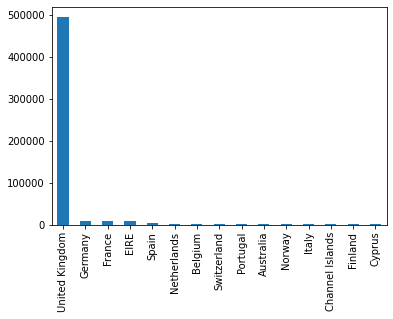

In [219]:
df.Country.value_counts()[0:15].plot(kind='bar')

# Distribution of total transaction by country. 

Remarks: 
Middle East countries have higher transactions.

---



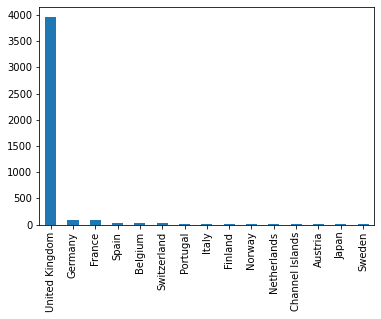

In [221]:
temp2_df=df[["CustomerID", "Country"]]
temp2_df.drop_duplicates(subset="CustomerID", inplace=True)
temp2_df.Country.value_counts()[0:15].plot(kind='bar')

# Distribution of unique Customers by country. 

Remarks: 
Middle East countries have higher Customers


<ipython-input-225-b6e872518527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df3["InvoiceDate"]= pd.to_datetime(temp_df3['InvoiceDate'])
<ipython-input-225-b6e872518527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df3['month'] = temp_df3['InvoiceDate'].dt.month


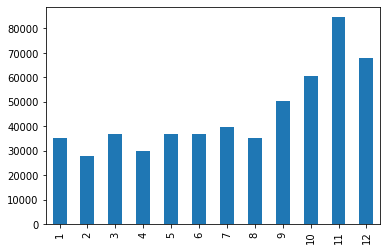

In [225]:
temp_df4=pd.read_csv("/content/drive/MyDrive/GUVI MAIN PRO /data.csv", encoding='latin')
temp_df3=temp_df4[["Quantity",	"InvoiceDate",	"UnitPrice"]]
temp_df3["InvoiceDate"]= pd.to_datetime(temp_df3['InvoiceDate'])
temp_df3['month'] = temp_df3['InvoiceDate'].dt.month
temp_df3
temp_df3.month.value_counts().sort_index().plot(kind='bar')

# Distribution of Sales by Month. 

Remarks: 
We can see that Finacial Quater - 3 have maximum sales

## NLP over description column


In [44]:
df2=pd.DataFrame()
df2["Description"]=df["Description"]
df2.shape

(541909, 1)

In [45]:
#Dropping Duplicates
df2.drop_duplicates(inplace=True)

#Dropping Null Values
df2.dropna(inplace=True)
df2.shape

(4223, 1)

In [46]:
#Removeing numbers and special characters
df2['Description_processed'] = df2['Description'].str.replace("[^a-zA-Z]", " ")
df2.head()

<ipython-input-46-9a7646ff5640>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Description_processed'] = df2['Description'].str.replace("[^a-zA-Z]", " ")


,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T LIGHT HOLDER
1,WHITE METAL LANTERN,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.,RED WOOLLY HOTTIE WHITE HEART


In [47]:
# Converting Text to Lower Case
def lower_case_convertion(text):
    """
    Input :- string
    Output :- lowercase string
    """
    text=str(text)
    lower_text = text.lower()
    return lower_text

df2["Description_processed"]=df2["Description_processed"].apply(lower_case_convertion)
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart t light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [48]:
# Removeing HTML url's
import re
def remove_urls(text):
    """
    Return :- String without URLs
    input :- String
    Output :- String
    """
    url_pattern = r'https?://\S+|www\.\S+'
    without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
    return without_urls
df2["Description_processed"]=df2["Description_processed"].apply(remove_urls)
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart t light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [49]:
pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# Spell - Check of the text

from spellchecker import SpellChecker

spell_corrector = SpellChecker()

# spelling correction using spellchecker
def spell_correction(text):
    """
    Return :- text which have correct spelling words
    Input :- string
    
    Output :- string
    """
    text=str(text)
    # initialize empty list to save correct spell words
    correct_words = []
    misSpelled_words = spell_corrector.unknown(text.split())

    for each_word in text.split():
        if each_word in misSpelled_words:
            right_word = spell_corrector.correction(each_word)
            if right_word:
              correct_words.append(right_word)
            else:
              correct_words.append(each_word)
            
        else:
            correct_words.append(each_word)

    correct_words=str(' '.join(correct_words))
    correct_spelling = correct_words
    return correct_spelling
df2["Description_processed"]=df2["Description_processed"].apply(spell_correction)
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart i light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [51]:
#Removeing Blank Rows 
df2['Description_processed'].replace('', np.nan, inplace=True)
df2.dropna(inplace=True)
df2.shape

(4219, 2)

In [52]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Converting Accented Characters
import unidecode

def accented_to_ascii(text):
    """
    Return :- text after converting accented characters
    Input :- string
    Output :- string
    """
    text = unidecode.unidecode(text)
    return text
df2["Description_processed"]=df2["Description_processed"].apply(accented_to_ascii)
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart i light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [54]:
#Removeing Emojis
def remove_emojis(text):
	"""
	Result :- string without any emojis in it
	Input :- String
	Output :- String
	"""
	emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)

	without_emoji = emoji_pattern.sub(r'',text)
	return without_emoji
df2["Description_processed"]=df2["Description_processed"].apply(remove_emojis)
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart i light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [55]:
#Removeing short words ahving two or less characters
df2['Description_processed'] = df2['Description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df2.head()

,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [56]:
# Removing Stopwords from Description text 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')


def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df2['Description_processed'] = [remove_stopwords(r) for r in df2['Description_processed']]
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [57]:
# Lemmatization of text
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df2['Description_processed'] = df2['Description_processed'].apply(lambda x: lemmatize_sentence(x))
df2.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Description,Description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,white hang heart light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid heart coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knit union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


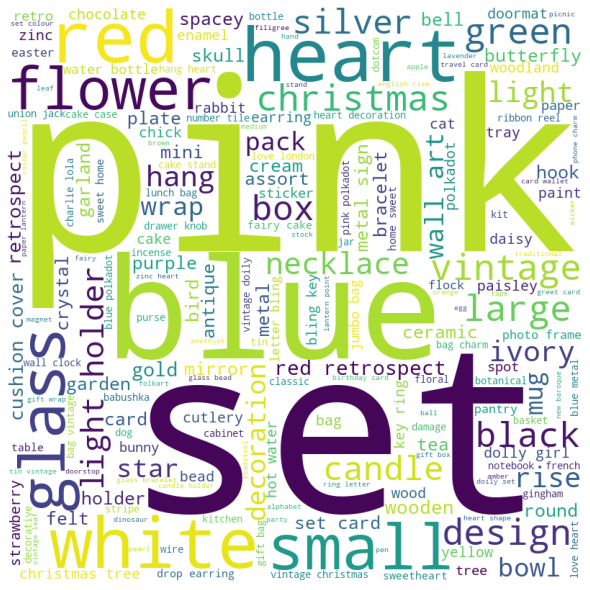

In [58]:
# Plotting word cloud
from wordcloud import WordCloud
#word_cloud_df = df.loc[df2['Description_processed'],:]
all_words = ' '.join([text for text in df2['Description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Mdoel Building 

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
tmp_df = tfidf.fit_transform(df2.Description_processed)
feature_names = tfidf.get_feature_names_out()

#Storing the result vector matrix in seprate Datafame for futher processing
df3=pd.DataFrame(tmp_df.toarray(), columns = feature_names)

df3.shape

(4219, 1812)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


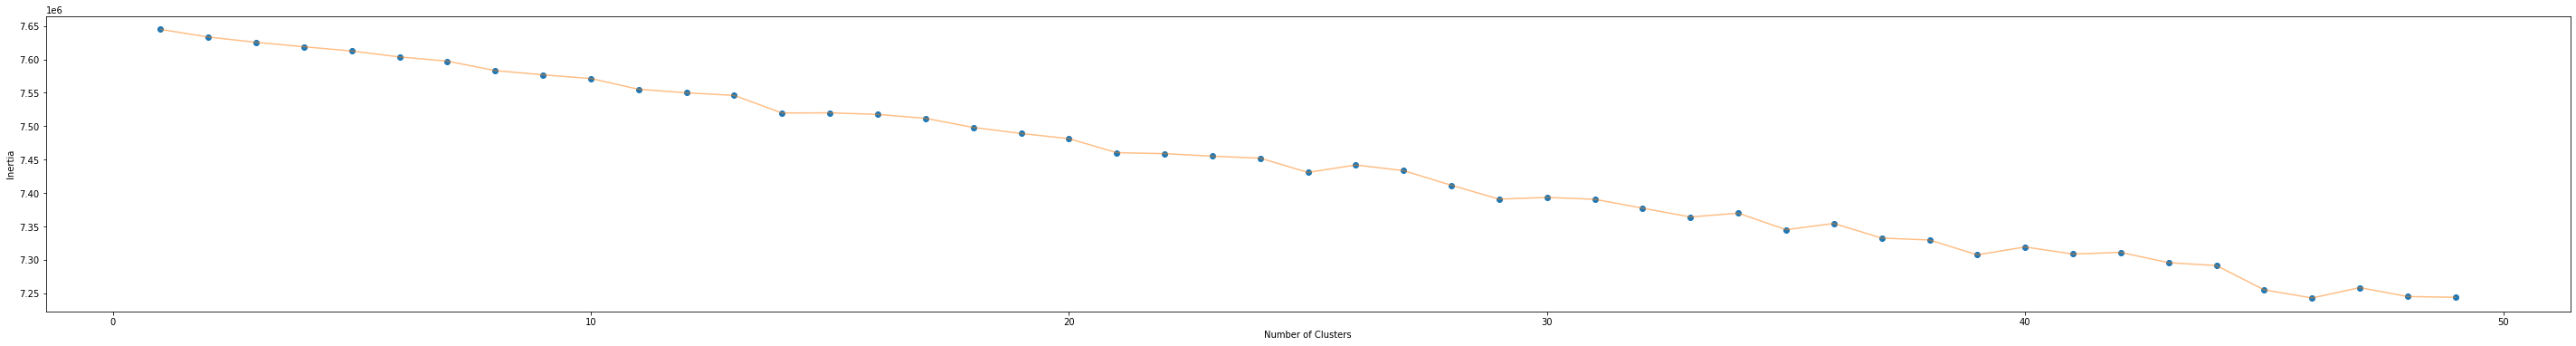

In [215]:
#Scaleing the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df3) # standardise data

# Finding the best value for K
inertia = []
for n in range(1 , 50):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X_std)
    inertia.append(algorithm.inertia_)
    
# Plotting Elbow plot
plt.figure(1 , figsize = (50 ,6))
plt.plot(np.arange(1 , 50) , inertia , 'o')
plt.plot(np.arange(1 , 50) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [27]:
# Building cluster model
km = KMeans(n_clusters=28) # applying k = 28
km.fit(X_std) 
km.labels_ 


array([ 3, 14, 14, ..., 14,  3, 14], dtype=int32)

In [65]:
df2.reset_index(inplace=True)
df2.index

RangeIndex(start=0, stop=4219, step=1)

In [70]:
df2.shape

(4219, 4)

In [66]:
temp_df=pd.DataFrame(km.labels_ , columns=["product_group_val"])
df2.reset_index(inplace=True)
product_df=pd.concat([df2, temp_df], axis=1)

print(product_df.head())
# This df is the gropuing of products. 
# I will use this to merge with the orginal Dataset to assign product group target value.


   level_0  index                          Description  \
0        0      0   WHITE HANGING HEART T-LIGHT HOLDER   
1        1      1                  WHITE METAL LANTERN   
2        2      2       CREAM CUPID HEARTS COAT HANGER   
3        3      3  KNITTED UNION FLAG HOT WATER BOTTLE   
4        4      4       RED WOOLLY HOTTIE WHITE HEART.   

              Description_processed  product_group_val  
0     white hang heart light holder                  3  
1               white metal lantern                 14  
2     cream cupid heart coat hanger                 14  
3  knit union flag hot water bottle                  0  
4     red woolly hottie white heart                  3  


In [68]:
product_df.shape

(4219, 5)

In [71]:
df.shape

(541909, 6)

In [72]:
df=pd.merge(df, product_df, on="Description")
# This also drops the null values in the Description column
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,level_0,index,Description_processed,product_group_val
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55,17511.0,United Kingdom,0,0,white hang heart light holder,3
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55,13408.0,United Kingdom,0,0,white hang heart light holder,3


In [73]:
df.shape

(540399, 10)

In [74]:
df.isnull().sum()

StockCode                     0
Description                   0
Quantity                      0
UnitPrice                     0
CustomerID               133570
Country                       0
level_0                       0
index                         0
Description_processed         0
product_group_val             0
dtype: int64

In [75]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,level_0,index,Description_processed,product_group_val
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,0,white hang heart light holder,3
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55,17511.0,United Kingdom,0,0,white hang heart light holder,3
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55,13408.0,United Kingdom,0,0,white hang heart light holder,3


In [ ]:
# Building a Martix of Unique Customer Id's and the respective Product purchased Grouping 

# Getting a list of Unique Customer Id's 
uniq_cid=(df["CustomerID"].unique())

ct=0 # Keeping Track of Loop 

user_prod_df=pd.DataFrame() # Initializeing Resultant df

# Looping through all user Id
for cid in uniq_cid:
  c=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  # Creating a empty list to fill it with incremental value of Product groups  
  
  temp_df2=df.loc[df['CustomerID'] == cid]["product_group_val"]  
  for row in temp_df2:
     
      for j, row1 in product_df.iterrows():
        if row==row1["product_group_val"]:
          c[row1["product_group_val"]]+=1
          break
  
  user_prod_df[cid]=c
  ct+=1    
  print(ct)            


In [115]:
user_prod_df=user_prod_df.transpose()
user_prod_df["CustomerID"]=user_prod_df.index
user_prod_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,CustomerID
17850.0,34,0,0,136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17850.0
17511.0,19,0,0,233,0,0,0,0,0,0,...,1,0,2,0,0,0,2,0,0,17511.0
13408.0,5,0,2,128,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,13408.0
15862.0,5,0,0,16,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,15862.0
16552.0,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16552.0


In [ ]:
# Calculation Each user total expenditure

df["total_exp"]=df["Quantity"]*df["UnitPrice"]

uniq_cid=(df["CustomerID"].unique())


ct=0
customer_exp_df=pd.DataFrame(columns=["total_exp"])
for cid in uniq_cid:
  temp3_df=df.loc[df['CustomerID'] == cid]["total_exp"]  
  tot_val=temp3_df.sum()
  customer_exp_df[cid]=[tot_val]
  ct+=1    
  print(ct)            


In [117]:
customer_exp_df=customer_exp_df.transpose()
customer_exp_df.drop("total_exp", inplace=True)
customer_exp_df["CustomerID"]=customer_exp_df.index
customer_exp_df.rename(columns = {0 :'total_exp'}, inplace = True)
customer_exp_df.head()

,total_exp,CustomerID
17850.0,5493.79,17850.0
17511.0,93999.38,17511.0
13408.0,28746.67,13408.0
15862.0,832.88,15862.0
16552.0,379.73,16552.0


In [118]:
print(customer_exp_df.shape)
print(user_prod_df.shape)


(4373, 2)
(4373, 30)


In [119]:
# Mergeing the total expenditure with the Customer Product group matix

user_prod_df=pd.merge(user_prod_df,customer_exp_df,  on="CustomerID")


In [120]:
print(user_prod_df.shape)

(4373, 31)


In [122]:
print(user_prod_df.columns)


Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
                 20,           21,           22,           23,           24,
                 25,           26,           27,           28, 'CustomerID',
        'total_exp'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


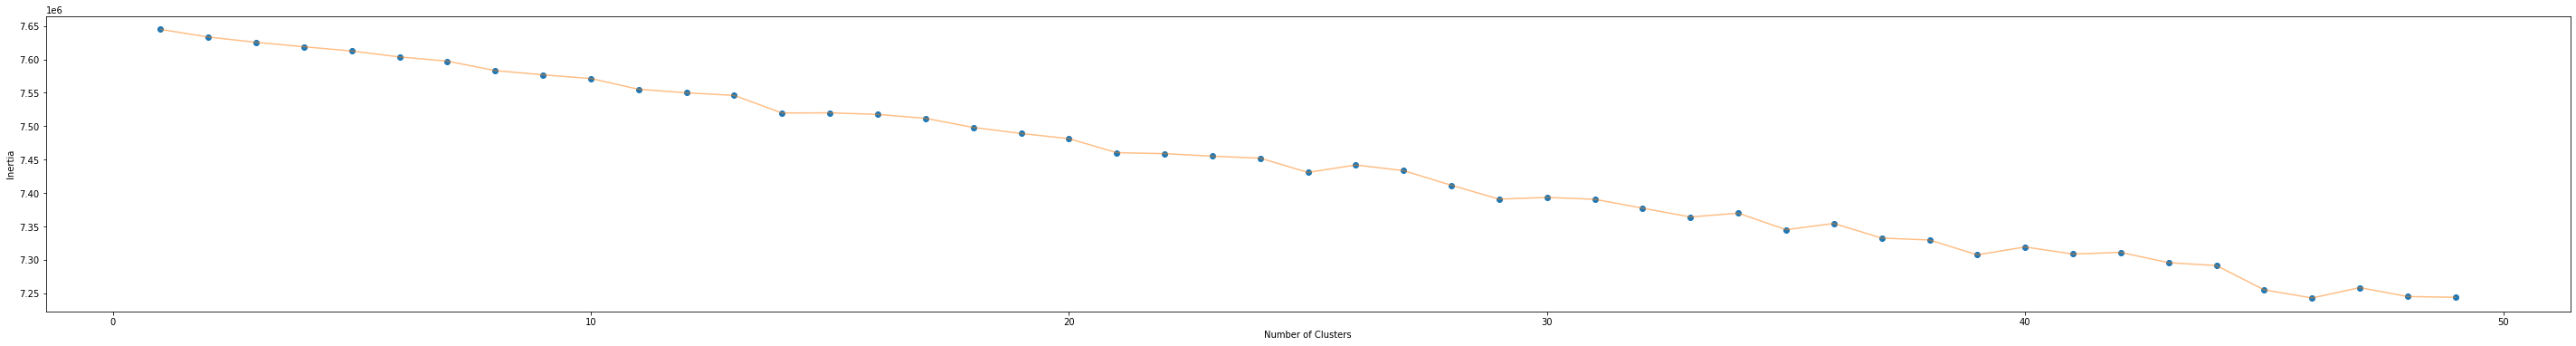

In [128]:
# Building a Model to Group Customers 
#Scaleing the Data
from sklearn.preprocessing import StandardScaler
X=user_prod_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 'total_exp']]

scaler = StandardScaler()
X_std2 = scaler.fit_transform(X) # standardise data

# Finding the best value for K
inertia = []
for n in range(1 , 50):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X_std)
    inertia.append(algorithm.inertia_)
    
# Plotting Elbow plot
plt.figure(1 , figsize = (50 ,6))
plt.plot(np.arange(1 , 50) , inertia , 'o')
plt.plot(np.arange(1 , 50) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [143]:
# Building cluster model
from sklearn.preprocessing import StandardScaler
X=user_prod_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 'total_exp']]

scaler = StandardScaler()
X_std2 = scaler.fit_transform(X) # standardise data

km = KMeans(n_clusters=25) # applying k = 28
km.fit(X_std2) 
km.labels_ 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 6, 17,  6, ...,  0,  0,  0], dtype=int32)

In [144]:
user_prod_df["User_Gropuing"]=pd.DataFrame(km.labels_ )
user_prod_df.dropna(inplace=True)
user_prod_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,CustomerID,total_exp,User_Gropuing
0,34,0,0,136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17850.0,5493.79,6.0
1,19,0,0,233,0,0,0,0,0,0,...,2,0,0,0,2,0,0,17511.0,93999.38,17.0
2,5,0,2,128,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13408.0,28746.67,6.0
3,5,0,0,16,0,0,0,0,0,0,...,0,0,0,1,0,0,0,15862.0,832.88,0.0
4,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16552.0,379.73,0.0


In [152]:
temp4_df=user_prod_df[["CustomerID","User_Gropuing"]]
temp4_df.shape

(4371, 2)

In [153]:
temp4_df.isnull().sum()

CustomerID       0
User_Gropuing    0
dtype: int64

In [157]:
# Building the result Dataframe

result_df=df["CustomerID"]
result_df.drop_duplicates(inplace=True)
result_df.dropna(inplace=True)

result_df.shape

(4372,)

In [158]:
result_df=pd.merge(result_df, temp4_df, on="CustomerID")

In [162]:
# Result DataFrame
result_df.head()

,CustomerID,User_Gropuing
0,17850.0,6.0
1,17511.0,17.0
2,13408.0,6.0
3,15862.0,0.0
4,16552.0,0.0


In [217]:
result_df.to_csv("Result_group.CSV")

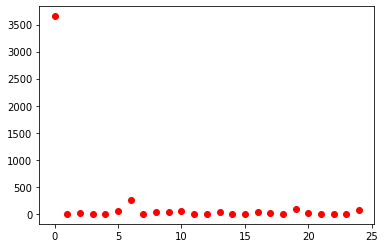

In [216]:
set5=(result_df.User_Gropuing.value_counts()).sort_values(ascending=False)
plt.plot((set5), 'ro')
plt.show()

# Distribution of Customers by Group

## Conclusion: 
As per the problem statement, the Customers have been grouped into 25 Groups. From alkalizing the data, a Majority of the customers and transactions come from Middle East Countries. There is a predominant increase in sales during the months from November to December. More promotions can be targeted during this period. 
